<img align="right" src="https://zenodo.org/record/7742997/files/Tops_Badge_Nasa.png" width="200" alt="NASA TOPS Logo">

# Transform to Open Science (TOPS) Group Project

[Akshay "XA" Mestry](https://www.linkedin.com/in/xames3/), [Bryan Palafox](https://www.linkedin.com/in/bryan-palafox/) and [Gianna Dubinski](https://www.linkedin.com/in/giadubinski/) under guidance of [Dr. Ian Moncrief](https://www.linkedin.com/in/ian-moncrief-nlu/)

## Open Science 101

The Open Science 101 is a 5-module curriculum designed to equip researchers, students and citizen scientists with the knowledge and skills to navigate the principles and practices of open science, including developing an open science and data management plan. Expand your Open Science expertise and equip yourself with the essential skills required to excel in the realm of open science.

[NLU](https://nl.edu) is supporting NASA's mission to Transform to Open Science. Check out the [NASA TOPS Github](https://github.com/nasa/Transform-to-Open-Science/blob/main/README.md#open-science-101-curriculum).

## Climate Change Impact on Phenology using [Budburst](https://budburst.org)

<div style="align: center; text-align:center;">
    <img src="https://raw.githubusercontent.com/CSIS-NLU/Open-Science-101/main/Group-Projects/Climate%20change%20impact%20on%20phenology%20using%20Budburst/assets/budburst_website.png" alt="Budburst" />
    <div></div>
    <div>Budburst <i>(https://budburst.org)</i></div>
</div>
</br>

**Purpose:** Using Open Science framework to analyze dataset(s) to answer how climate change is impacting [phenology](https://www.usanpn.org/about/phenology#:~:text=Phenology%20is%20the%20study%20of,animals%2C%20and%20other%20living%20things.).

**Introduction:** [Budburst](https://budburst.org) research project is a community-driven effort, supported by the [Chicago Botanic Gardens](https://www.chicagobotanic.org). We are using the dataset from their [Plants & Climate Change](https://budburst.org/projects) research project to investigate our topic of how climate change is impacting [Red Maple](https://www.srs.fs.usda.gov/pubs/misc/ag_654/volume_2/acer/rubrum.htm#:~:text=Growth%20and%20Yield%2D%20Red%Maple) tree phenology. As part of the Open Science initiative and in their spirit, we adhered our research closely to their principles and practices, in an effort to make our research case study, data, processes and analysis available to all. Exercising Open Data principles, we narrowed our search for open-data for our project, focusing on the FAIR principles and thus chose Budburst. We filtered the Budburst dataset for the Red Maple observations from 2013 to 2023 for selected US states and a particular [phenophase](https://ndep.nv.gov/uploads/land-tribe-docs/Phenology_Handbook_2nd_ed_Abridged.pdf). In order to obtain the climate data we identified historical weather patterns from open-data platforms like [Weather Underground](https://www.wunderground.com).

<div style="align: center; text-align:center;">
    <img src="https://raw.githubusercontent.com/CSIS-NLU/Open-Science-101/main/Group-Projects/Climate%20change%20impact%20on%20phenology%20using%20Budburst/assets/weather_underground_website.png" alt="Weather Underground" /></br>
    <div></div>
    <div>Weather Underground <i>(https://wunderground.com)</i></div>
</div>
</br>

**NOTE:** We also used data from the [National Phenology Network](https://data.usanpn.org/vis-tool/#/) (NPN), from 2013 to 2023 to compare the phenophases of Red Maple across the US.

## Hypotheses

Every research or a case study begins by considering two **hypotheses**. They are called the **Null hypothesis** and the **Alternative hypothesis**. These hypotheses contain opposing viewpoints. For our research, we present the below two hypotheses.

<details><summary>Hypothesis A</summary>
&nbsp;&nbsp;&nbsp;&nbsp;$H_0$: The Red Maple tree buds earlier in 2023 compared to 2013 because of increasing temperatures.</br>
&nbsp;&nbsp;&nbsp;&nbsp;$H_a$: The Red Maple tree budding is unaffected by the increasing temperatures.
</details>

<details><summary>Hypothesis B</summary>
&nbsp;&nbsp;&nbsp;&nbsp;$H_0$: We predict there are higher first-bud Red Maple observations from the Eastern US because of the favorable weather conditions.</br>
&nbsp;&nbsp;&nbsp;&nbsp;$H_a$: The weather conditions do not affect the first-bud Red Maple observations.
</details>

## Data Collection

<img align="left" src="https://raw.githubusercontent.com/CSIS-NLU/Open-Science-101/main/Group-Projects/Climate%20change%20impact%20on%20phenology%20using%20Budburst/assets/budburst_download_data.png" style="padding-right:20px" width="300" alt="Budburst Data Download">

Based on our two hypotheses and sampling plan, we downloaded the complete [Budburst dataset](https://raw.githubusercontent.com/CSIS-NLU/Open-Science-101/main/Group-Projects/Climate%20change%20impact%20on%20phenology%20using%20Budburst/budburst_observations_with_temperature.csv) from early 2007 to 15 July, 2024 from their website. Similarly, for the weather (avg. temperature) data, we used Weather Underground for preparing our data. Both data observations were saved and made available in **.csv** format.

**Note:** Although the Budburst data was properly structured, it had a lot of inconsistencies (pertaining to the state names and their abbreviations) and missing a lot of values.

Anyone can download data from the Budburst project, assuming they have an account on their website. The data is accessible for everyone for free and can be filtered to user's need. The data can be downloaded from [here](https://budburst.org/data). Users can provide a time frame for their data alongside a couple of nifty filters. The oldest data available is from February, 2007. Since Budburst is a global community-driven initiative, there are observations from all around the world. Users can pick a specific region (Country or State), Plant groups (Wildflowers & Herbs, Conifers, Grasses, etc.) and Observation type (Phenology, Pollinators, etc.). Since, our project is learning about the phenology of plants, we chose *phenology* as our observation type.

The data can be exported in **Excel** or **CSV** format.

**Note:** The link to download the data takes some time, depending upon the volume of data requested.

### Why few states and time span?

We chose states that have observations in 2013 and 2023. And the reason that we chose this specific time span is because there weren't many observations prior to 2013 and using a ten year time span would provide a larger data set to test and observe.

## Data Loading and Preprocessing

For processing and analyzing the data, we used [Python](https://python.org) as our primary programming language of choice. Although, we started prototyping and brainstorming our analysis using Microsoft Excel. Python has support for libraries related to Data Analysis, Machine Learning and Visualization domains. For this project we used few of the popular Open Source packages like [Matplotlib](https://matplotlib.org), [NumPy](https://numpy.org) and [Pandas](https://pandas.pydata.org/docs/index.html).

### Matplotlib

<img align="right" src="https://matplotlib.org/stable/_static/logo_dark.svg" style="padding-left:20px" width="300" alt="Matplotlib">

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible. A large number of third party packages extend and build on Matplotlib functionality, including several higher-level plotting interfaces (seaborn, HoloViews, ggplot, ...), and a projection and mapping toolkit (Cartopy).

### NumPy

<img align="left" src="https://numpy.org/images/logo.svg" style="padding-right:20px" width="100" alt="NumPy">

NumPy is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more.
</br></br>
### Pandas

<img align="right" src="https://pandas.pydata.org/static/img/pandas.svg" style="padding-left:20px" width="200" alt="Pandas">

pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language. The Pandas library is used for data manipulation and analysis. Pandas consist of data structures and functions to perform efficient operations on data.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import HTML
from IPython.display import IFrame

**Note:** ```%matplotlib inline``` sets the backend of matplotlib to the "inline" backend. With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.

Setting some display options to better visualize the data.

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.show_dimensions", True)
pd.options.display.float_format = "{:,.2f}".format

CSS = """\
<style>
.up::after {
  content: " ▲";
  color: green;
}

.down::after {
  content: " ▼";
  color: red;
}
"""


def trends(df: pd.DataFrame, col_idx: int) -> np.ndarray:
    """Assist with trend arrows for the dataframe."""
    return np.sign(df.diff(col_idx, axis=1)).replace({1: "up", -1:"down", 0: ""})

In [3]:
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.grid"] = False
plt.rcParams["axes.titlesize"] = 8
plt.style.use("fivethirtyeight")

### Loading Data in Pandas

As mentioned above, Pandas is a widely-used Python library for data science, analysis, and machine learning that offers a flexible and intuitive way to handle data sets of all sizes. One of the most important functionalities of pandas is the tools it provides for reading and writing data. For data available in a tabular format and stored as a **CSV** file, you can use pandas to read it into memory using the ``read_csv()`` function, which returns a pandas dataframe. But there are other functionalities too. For example, you can use pandas to perform merging, reshaping, joining, and concatenation operations.

**Note:** Here, we're reading the CSV data from a URL where we have stored the data.

In [4]:
BUDBURST_CSV: str = "https://raw.githubusercontent.com/CSIS-NLU/Open-Science-101/main/Group-Projects/Climate%20change%20impact%20on%20phenology%20using%20Budburst/budburst_observations_with_temperature.csv"

In [5]:
budburst = pd.read_csv(BUDBURST_CSV, dtype="unicode")

In [6]:
budburst.head()

,report_id,report_type,site_species_id,species_id,common_name,family,genus,species,infra_rank,infra_epithet,sec_infra_rank,sec_infra_epithet,cultivar,plant_group_id,official_budburst_species,location_id,latitude,longitude,locality,administrative_area_level_1,postal_code,administrative_area_level_2,country,observation_date,notes,observation_id,phenophase_id,phenophase_plant_structure,phenophase_title,pollinators_time_start,pollinators_time_end,pollinators_temperature_fahrenheit,pollinators_cloud_cover_id,pollinators_flowering_stage_id,pollinators_number_open_flowers,pollinators_plant_height,pollinators_ants,pollinators_bats,pollinators_bees_general,pollinators_bees_other,pollinators_beetles,pollinators_birds,pollinators_bumble_bees,pollinators_butterflies,pollinators_butterflies_moths,pollinators_carpenter_bees,pollinators_flies,pollinators_honey_bees,pollinators_large_bees_wasps,pollinators_metallic_green_bees,pollinators_moths,pollinators_not_sure,pollinators_small_bees_flies,pollinators_wasps,monarchs_patch_name,monarchs_monitoring_all_plants_in_patch,monarchs_number_of_plants_in_patch,monarchs_no_insects_present,monarchs_ants_present,monarchs_milkweed_aphids_present,monarchs_japanese_beetles_present,monarchs_milkweed_beetles_present,monarchs_milkweed_bugs_present,monarchs_other_insects_present,monarchs_spiders_present,monarchs_stem_plant_flowering_stage,monarchs_stem_number_flower_clusters,monarchs_stem_number_eggs,monarchs_stem_number_instar_1,monarchs_stem_number_instar_2_5,monarchs_stem_number_instar_2,monarchs_stem_number_instar_3,monarchs_stem_number_instar_4,monarchs_stem_number_instar_5
0,4,phenology,4,59,red maple,Sapindaceae,Acer,rubrum,NaN,NaN,NaN,NaN,NaN,DTS,1,77,32.780900000000000,-95.3786,Quitman,TX,75783,Wood County,US,2/7/08,Legacy report. The weather has been a mixture ...,4,FL-FIRST,Flowers,First Flower,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,phenology,5,59,red maple,Sapindaceae,Acer,rubrum,NaN,NaN,NaN,NaN,NaN,DTS,1,95,33.885800000000000,-83.4205,Watkinsville,GA,30677,Oconee County,US,2/7/08,Legacy report.,6,FL-FIRST,Flowers,First Flower,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11,phenology,7,19,red columbine,Ranunculaceae,Aquilegia,canadensis,NaN,NaN,NaN,NaN,NaN,WH,1,101,35.793900000000000,-78.6743,Raleigh,NC,27607,Wake County,US,2/16/08,Legacy report.,11,LV-FIRSTUNFOLDED,Leaves,First Leaf Unfolded,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14,phenology,33002,8295,American pussy willow,Salicaceae,Salix,discolor,NaN,NaN,NaN,NaN,NaN,DTS,1,107,41.080400000000000,-86.8954,Medaryville,IN,47957,Pulaski County,US,2/16/08,Legacy report.,14,FL-FIRST,Flowers,First Flower,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,phenology,10,69,Border Forsythia,Oleaceae,Forsythia,x intermedia,NaN,NaN,NaN,NaN,NaN,DTS,1,101,35.793900000000000,-78.6743,Raleigh,NC,27607,Wake County,US,2/11/08,Legacy report.,15,FL-FIRST,Flowers,First Flower,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Processing (Munging)

#### Filtering

When working with large datasets, efficient data filtering is crucial to extract the specific information we need. Filtering data from a pandas data frame is one of the most common operations when cleaning the data. Pandas provides a wide range of methods for selecting data according to the position and label of the rows and columns. In addition, Pandas also allows you to obtain a subset of data based on column types and to filter rows with boolean indexing. We used `.loc[...]` method for filtering. There are a lot of different methods available for getting the same results, some fast and some slow. It is totally up to the user to chose filtering strategies depending upon the type and shape of the dataset.

#### Remove Empty Columns

The `.dropna(axis=1, how="all")` method removes the columns that are empty.

In [7]:
budburst = (
    budburst
    .loc[budburst["report_type"] == "phenology"]
    .loc[budburst["common_name"] == "red maple"]
    .loc[budburst["country"].isin(("United States", "US"))]
    .loc[budburst["phenophase_title"].isin(("Bud burst", "Leaf bud burst"))]
    .dropna(axis=1, how="all")
)

In [8]:
budburst.head()

,report_id,report_type,site_species_id,species_id,common_name,family,genus,species,plant_group_id,official_budburst_species,location_id,latitude,longitude,locality,administrative_area_level_1,postal_code,administrative_area_level_2,country,observation_date,notes,observation_id,phenophase_id,phenophase_plant_structure,phenophase_title,pollinators_temperature_fahrenheit
5717,17948,phenology,7107,59,red maple,Sapindaceae,Acer,rubrum,DTS,1,7461,38.020100000000000,-78.6344,Charlottesville,VA,22903,Albemarle County,US,2/7/13,NaN,17221,LU-BUDBURST,Leaves Unfolding,Leaf bud burst,NaN
5722,17957,phenology,7112,59,red maple,Sapindaceae,Acer,rubrum,DTS,1,7489,32.352400000000000,-90.0707,Flowood,MS,39232,Rankin County,US,2/9/13,A few bud bursts,17227,LU-BUDBURST,Leaves Unfolding,Leaf bud burst,NaN
5781,18127,phenology,7180,59,red maple,Sapindaceae,Acer,rubrum,DTS,1,7437,39.061400000000000,-76.5843,Crownsville,MD,21032,Anne Arundel County,US,3/11/13,NaN,17363,LU-BUDBURST,Leaves Unfolding,Leaf bud burst,NaN
5791,18141,phenology,7190,59,red maple,Sapindaceae,Acer,rubrum,DTS,1,7689,38.437100000000000,-77.7374,Sumerduck,VA,22742,Fauquier County,US,3/10/13,NaN,17377,LU-BUDBURST,Leaves Unfolding,Leaf bud burst,45
5798,18167,phenology,5617,59,red maple,Sapindaceae,Acer,rubrum,DTS,1,5866,39.008600000000000,-77.1047,Bethesda,MD,20814,Montgomery County,US,3/15/13,NaN,17403,LU-BUDBURST,Leaves Unfolding,Leaf bud burst,NaN


#### Type Casting (Value Conversion)

When a CSV file is imported and a Data Frame is made, the Date time objects in the file are read as a string object rather than a Date Time object Hence it’s very tough to perform operations like Time difference on a string rather than a Date Time object. Pandas `.to_datetime()` method helps to convert string Date time into Python Date time object.

In [9]:
budburst["observation_date"] = budburst["observation_date"].apply(pd.to_datetime)
budburst["observation_month"] = budburst["observation_date"].dt.strftime("%B").astype(str)
budburst["observation_year"] = budburst["observation_date"].dt.to_period("Y").astype(str)

In [10]:
budburst = budburst[pd.notnull(budburst["pollinators_temperature_fahrenheit"])]

In [11]:
budburst.head()

,report_id,report_type,site_species_id,species_id,common_name,family,genus,species,plant_group_id,official_budburst_species,location_id,latitude,longitude,locality,administrative_area_level_1,postal_code,administrative_area_level_2,country,observation_date,notes,observation_id,phenophase_id,phenophase_plant_structure,phenophase_title,pollinators_temperature_fahrenheit,observation_month,observation_year
5791,18141,phenology,7190,59,red maple,Sapindaceae,Acer,rubrum,DTS,1,7689,38.437100000000000,-77.7374,Sumerduck,VA,22742,Fauquier County,US,2013-03-10,NaN,17377,LU-BUDBURST,Leaves Unfolding,Leaf bud burst,45,March,2013
5947,18540,phenology,7380,59,red maple,Sapindaceae,Acer,rubrum,DTS,1,7982,39.167200000000000,-86.5125,Bloomington,IN,47405,Monroe County,US,2013-03-28,NaN,17701,LU-BUDBURST,Leaves Unfolding,Leaf bud burst,35,March,2013
5970,18572,phenology,7408,59,red maple,Sapindaceae,Acer,rubrum,DTS,1,8021,39.172700000000000,-86.5294,Bloomington,IN,47408,Monroe County,US,2013-04-03,NaN,17733,LU-BUDBURST,Leaves Unfolding,Leaf bud burst,52,April,2013
5980,18589,phenology,7419,59,red maple,Sapindaceae,Acer,rubrum,DTS,1,8034,39.165300000000000,-86.5264,Bloomington,IN,47405,Monroe County,US,2013-04-04,NaN,17750,LU-BUDBURST,Leaves Unfolding,Leaf bud burst,52,April,2013
5982,18591,phenology,7421,59,red maple,Sapindaceae,Acer,rubrum,DTS,1,8036,39.165300000000000,-86.5264,Bloomington,IN,47405,Monroe County,US,2013-03-07,NaN,17752,LU-BUDBURST,Leaves Unfolding,Leaf bud burst,35,March,2013


### Data Analysis

#### Hypothesis A

The Red Maple tree buds earlier in 2023 compared to 2013 because of increasing temperatures.

In [12]:
hypothesis_a = (
    budburst
    .groupby(["observation_year", "observation_month"])
    .agg({"observation_month": "count"})
    .unstack("observation_month")
    .fillna(0)
    .astype(int)
).T
hypothesis_a.columns = [f"Count in {year}" for year in (2013, 2023)]
hypothesis_a.index.names = ["", "Months"]
HTML(CSS + hypothesis_a.style.set_td_classes(trends(hypothesis_a, 1)).to_html())

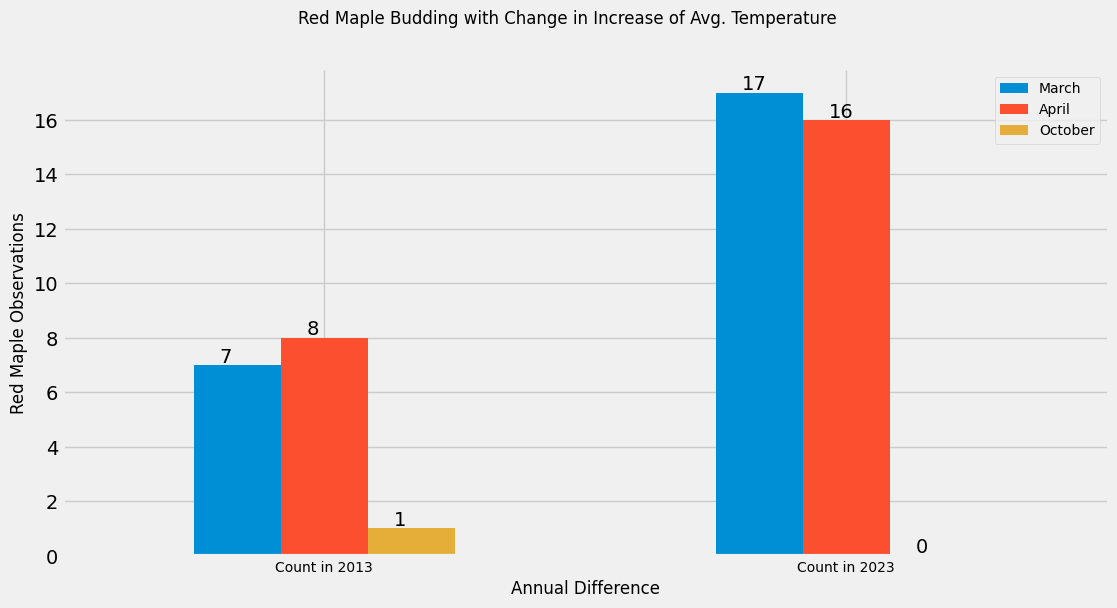

In [13]:
plot_a = hypothesis_a.T.plot(kind="bar", figsize=(12, 6))
plt.suptitle("Red Maple Budding with Change in Increase of Avg. Temperature", fontsize=12)
plt.xlabel("Annual Difference", fontsize=12)
plt.ylabel("Red Maple Observations", fontsize=12)
plt.legend(budburst["observation_month"].unique(), loc="best", fontsize=10)
_ = plt.xticks(rotation=0, fontsize=10)

for patch in plot_a.patches:
    plot_a.annotate(str(patch.get_height()), (patch.get_x() + 0.05, patch.get_height() + 0.1))

#### Hypothesis B

We predict there are higher first-bud Red Maple observations from the Eastern US because of the favorable weather conditions.

In [14]:
hypothesis_b = (
    budburst
    .groupby(["observation_year", "administrative_area_level_1"])
    .agg({"pollinators_temperature_fahrenheit": "count"})
    .sort_values(by="administrative_area_level_1")
    .unstack("observation_year")
)
hypothesis_b.columns = [f"Count in {year}" for year in (2013, 2023)]
hypothesis_b.index.names = ["US States"]
HTML(CSS + hypothesis_b.style.set_td_classes(trends(hypothesis_b, 1)).to_html())

,Count in 2013,Count in 2023
US States,,
IL,1,9
IN,7,2
MA,1,2
NC,2,9
NY,1,2
PA,2,6
VA,2,3


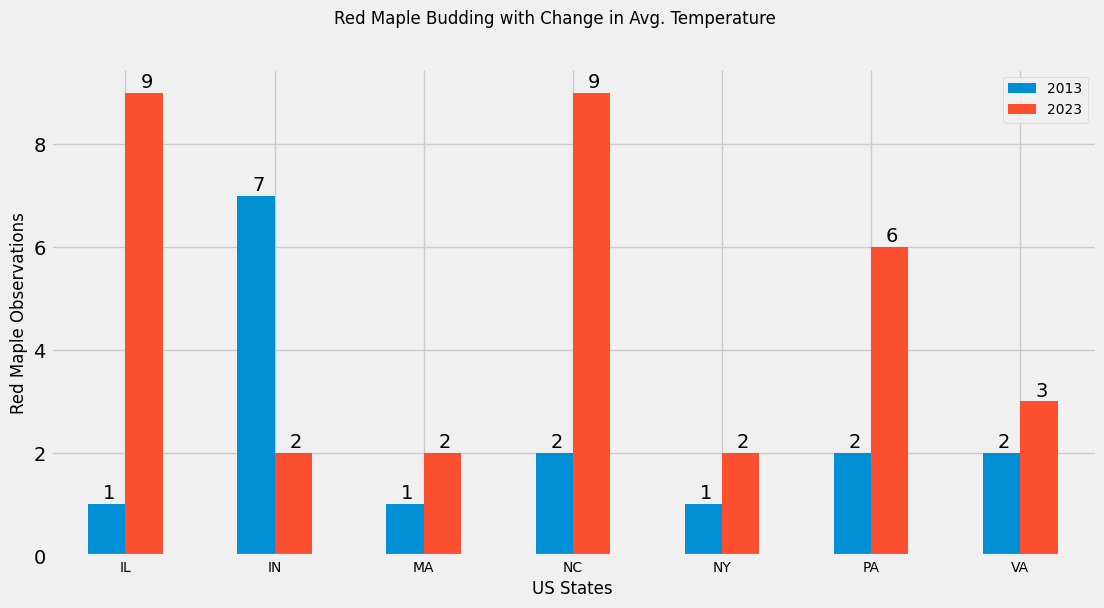

In [15]:
plot_b = hypothesis_b.plot(kind="bar", figsize=(12, 6))
plt.suptitle("Red Maple Budding with Change in Avg. Temperature", fontsize=12)
plt.xlabel("US States", fontsize=12)
plt.ylabel("Red Maple Observations", fontsize=12)
plt.legend([2013, 2023], loc="best", fontsize=10)
_ = plt.xticks(rotation=0, fontsize=10)

for patch in plot_b.patches:
    plot_b.annotate(str(patch.get_height()), (patch.get_x() + 0.1, patch.get_height() + 0.1))

In [16]:
IFrame("https://data.usanpn.org/vis-tool/#/explore-phenological-findings;s=eJy1Vd9v2jAQ%2Flciaw%2BbFCCEX4G3CsSEpm5d6bSHqoqO5AgWjp3ZzmhW8b%2FvnAArow%2Bb1OYpd%2FZ93%2BfPyd0Tw0eLWoJgkyf2LhFgDJuwayiWKDCxXEnms6zkKWXH%2FVUQDYKg1euuxq3%2BOola0bA%2Fbq1htO4Ng34UjVLanaMFQtv7TKLdKb1dpIR5%2F%2BAzY8EhnmJZ5jOozNcSBLfVnAuSwia9wGeFUNZtemKmwISjcfIOr7ET0%2FNZovJcyVhCjiROY%2BrlUAh0elGW7hhXCeEdwqZqFB7D8%2BprV2m8967iA5WcWJkuV7rMKbXlMktVTqkbAdKCI%2BKWm9jCo5Iq50lsJJuE0SiMfLYuZe0eiNhWhaOYEWJaqtJ4K60gFQhrQqgdr7V1B8foXNpcqB1qIvdqXnMqOknPpBJcFYanQItKp6hrxPHoGJ0jLsscEt%2B7LdEDmXpLBcUKta68OeRcuGMf644FUHCZgqhX1m5T1dgZjk%2Fx%2BdYEa38Oa3%2FRn%2FNVf%2Bw%2BWEW3vjwk7igRL2bkjn%2BWI5gv2uHRRQgCmBIDvbOJLIXw2TdD4mfcFAKquvbTC5e3yCHD%2BAbspinb%2By%2Fwhhe8p3t8BVq2sbaYdDq73a5dGpCFbCudddacrO6YDdBH3eFuP0WmG%2B423GKsYBunRxHxmtM31i5kxl7UP7jQfyUEavoH3tS14QXtXCX%2Fd1PN%2Br%2FRjS%2FoptRSVhoODezNDtq7%2FC4%2FakTpfYef6E0hL4Bnb6qgH1wouFF0xdK705BsUZtXl%2FFArb3YoFTFBgy6zlxH8bNe5p%2BlDj%2F%2BQlK%2FBOGZjVLWU9pzPdDLtNoR9HmFwR8lyoSqusH%2B1B9uQW4J59icn6s4LDUDbE%2BzRRWQ0FBhk6A9op%2BADoh6ChYzpavj8evk51pck6gQaACFQejGC%2FnkxtF9L2pH%2FSCMgoHfGo%2Faw263H%2FaG4%2BYhpl%2FKGdZ3MtFaMrAZVs%2FfG8F33AqcK52DdVLrptiqvdnv978B6sGRnw%3D%3D", 1100,500)

In [17]:
IFrame("https://data.usanpn.org/vis-tool/#/explore-phenological-findings;s=eJy1VU1v2zAM%2FSuGsMMGOIlj58u5FQ0yBEOxrumwQ1EYjM04QmTJk%2BRlXpH%2FPspOsmbpYQNan0RKfO%2BJlMknhj8tagmCTZ%2FYu1SAMWzKbqBcosDUciWZz%2FKKZ%2BTNsjiO4iDqhKP%2BpDOI%2B6vOagRBZxitcRRlowkOQjpdoAVC2%2FtMot0pvV1khPnw6DNjwSGebFkVM6jNlwoEt%2FWcC5LCplHgs1Io6w49MVNiytE4eYdl4sREPktVUSiZSCiQxGnMvAJKgU4vyspd4yolvIPZRo3Do3kefeMijffeRXygkBMr09VKVwW5tlzmmSrIdStAWnBE3HKTWPippCp4mhjJpuFkHE58tq5kkz0Qia1LRzEjxKxSlfFWWkEmENaE0GS80dYfHq1zaXOhdqiJ3Gt4zSnoJD2XSnBVGp4BbSqdoW4Q4%2FHROkdcVgWkvndXoQcy85YKyhVqXXtzKLhw1z7GHQOg5DID0eys3aG6TWcYn%2Bzzoyk2%2BTns%2FUV%2Fzlf%2FSfchVVT15cFxT45kMaPs%2BGc%2BgvmsHR4VQhDANTHQmk1lJYTPvhoSP%2BOmFFA3sZ9eKN6igByTW7CbNmzvv8AbXvCe6vgKtGxjbTnt9Xa7XbcyIEvZVTrvrTmlumc2QI%2B6x915skw%2F3G24xUTBNsmOIpI1pzfWLWXOXtQ%2FvNB%2FJQRq%2BgfeNGujC9q5Sv%2BvUu3%2Bv9HFF3TX1FJWGg4N7M0uGl2%2By48aUXrf4Ad611CUwPM3VTAILhTcKiqx9O41pFvU5tVlPFJrLzcoVbkBg64zN1byrJf5Z67Dj7%2BQ1C9BeGajlPWU9lwP9HKtdgR9HmHwe4Uypah%2BsD%2F1hzuQW8I5NufnKg5b7QDb02xRJaQ0VNg06I7pJ6gRaLSEQd8NDsqAGzQP0aQ7GQThJBj6nXjcHfX7gzAaxe1HGL%2BUS8XACUBrKTXtGHq%2BbqXccytwrnQB1olo2l2nufV%2Bv%2F8NaHmEAA%3D%3D", 1100, 500)

<div overflow: hidden;">
     <div style="width: 540px; float:left;"><img src="https://raw.githubusercontent.com/CSIS-NLU/Open-Science-101/main/Group-Projects/Climate%20change%20impact%20on%20phenology%20using%20Budburst/assets/Map%202013.png" style="padding-right:20px" alt="Map 2013"></div>
     <div style="margin-left: 540px;"><img src="https://raw.githubusercontent.com/CSIS-NLU/Open-Science-101/main/Group-Projects/Climate%20change%20impact%20on%20phenology%20using%20Budburst/assets/MAP%202023.png" style="padding-right:20px" alt="Map 2023"></div>
</div>